<a href="https://colab.research.google.com/github/Mikeike34/MLA_MJC/blob/main/MLA2_MJC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##<u>Standard Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


##<u>Imports for Specific Models

In [242]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn import set_config
set_config(display = 'diagram')
from sklearn.metrics import mean_squared_error, r2_score,confusion_matrix,precision_score,recall_score,f1_score,roc_curve,roc_auc_score,precision_recall_curve,auc

##<u>Linear Regression - Acquire Data

In [171]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/Steel_industry_data.csv')

In [172]:
df.rename(columns={'Usage_kWh':'usage_kwh', 'Lagging_Current_Reactive.Power_kVarh':'lag_react_pwr_kvarh','Leading_Current_Reactive_Power_kVarh':'lead_react_pwr_kvarh','Lagging_Current_Power_Factor':'lag_current_pwr','Leading_Current_Power_Factor':'lead_current_pwr','NSM':'nsm','WeekStatus':'week_status','Day_of_week':'day_of_week','Load_Type':'load_type'},inplace= True)

In [57]:
df.head()

,date,usage_kwh,lag_react_pwr_kvarh,lead_react_pwr_kvarh,CO2(tCO2),lag_current_pwr,lead_current_pwr,nsm,week_status,day_of_week,load_type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


##<u>Statistics and Visual Exploration

In [97]:
df.sum()

,0
date,01/01/2018 00:1501/01/2018 00:3001/01/2018 00:...
usage_kwh,959636.71
lag_react_pwr_kvarh,456759.84
lead_react_pwr_kvarh,135638.04
CO2(tCO2),403.81
lag_current_pwr,2823455.09
lead_current_pwr,2956250.16
nsm,1497960000
week_status,WeekdayWeekdayWeekdayWeekdayWeekdayWeekdayWeek...
day_of_week,MondayMondayMondayMondayMondayMondayMondayMond...


              count     load_type
load_type                        
Light_Load    18072    Light_Load
Medium_Load    9696   Medium_Load
Maximum_Load   7272  Maximum_Load


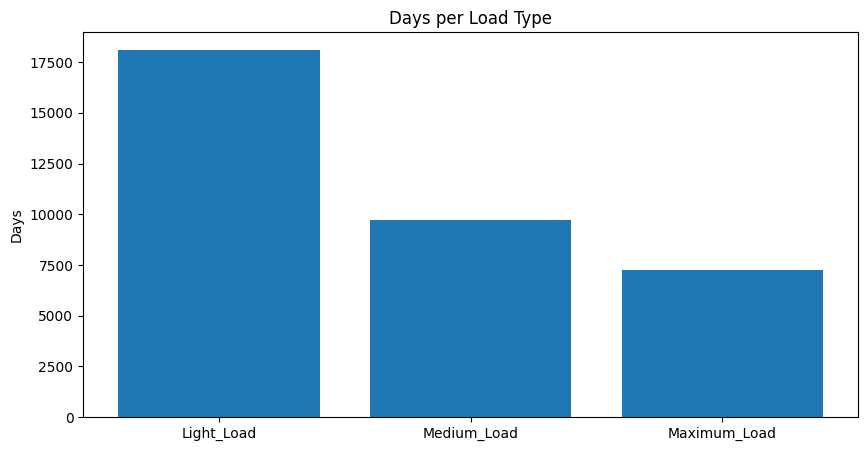

In [59]:
load_type_count = df['load_type'].value_counts()
load_count_df = pd.DataFrame(load_type_count)
load_type = df['load_type'].unique()
load_count_df['load_type']=load_type
print(load_count_df)
plt.figure(figsize=(10,5))
plt.bar(load_count_df['load_type'],load_count_df['count'])
plt.title('Days per Load Type')
plt.ylabel('Days')
plt.show()

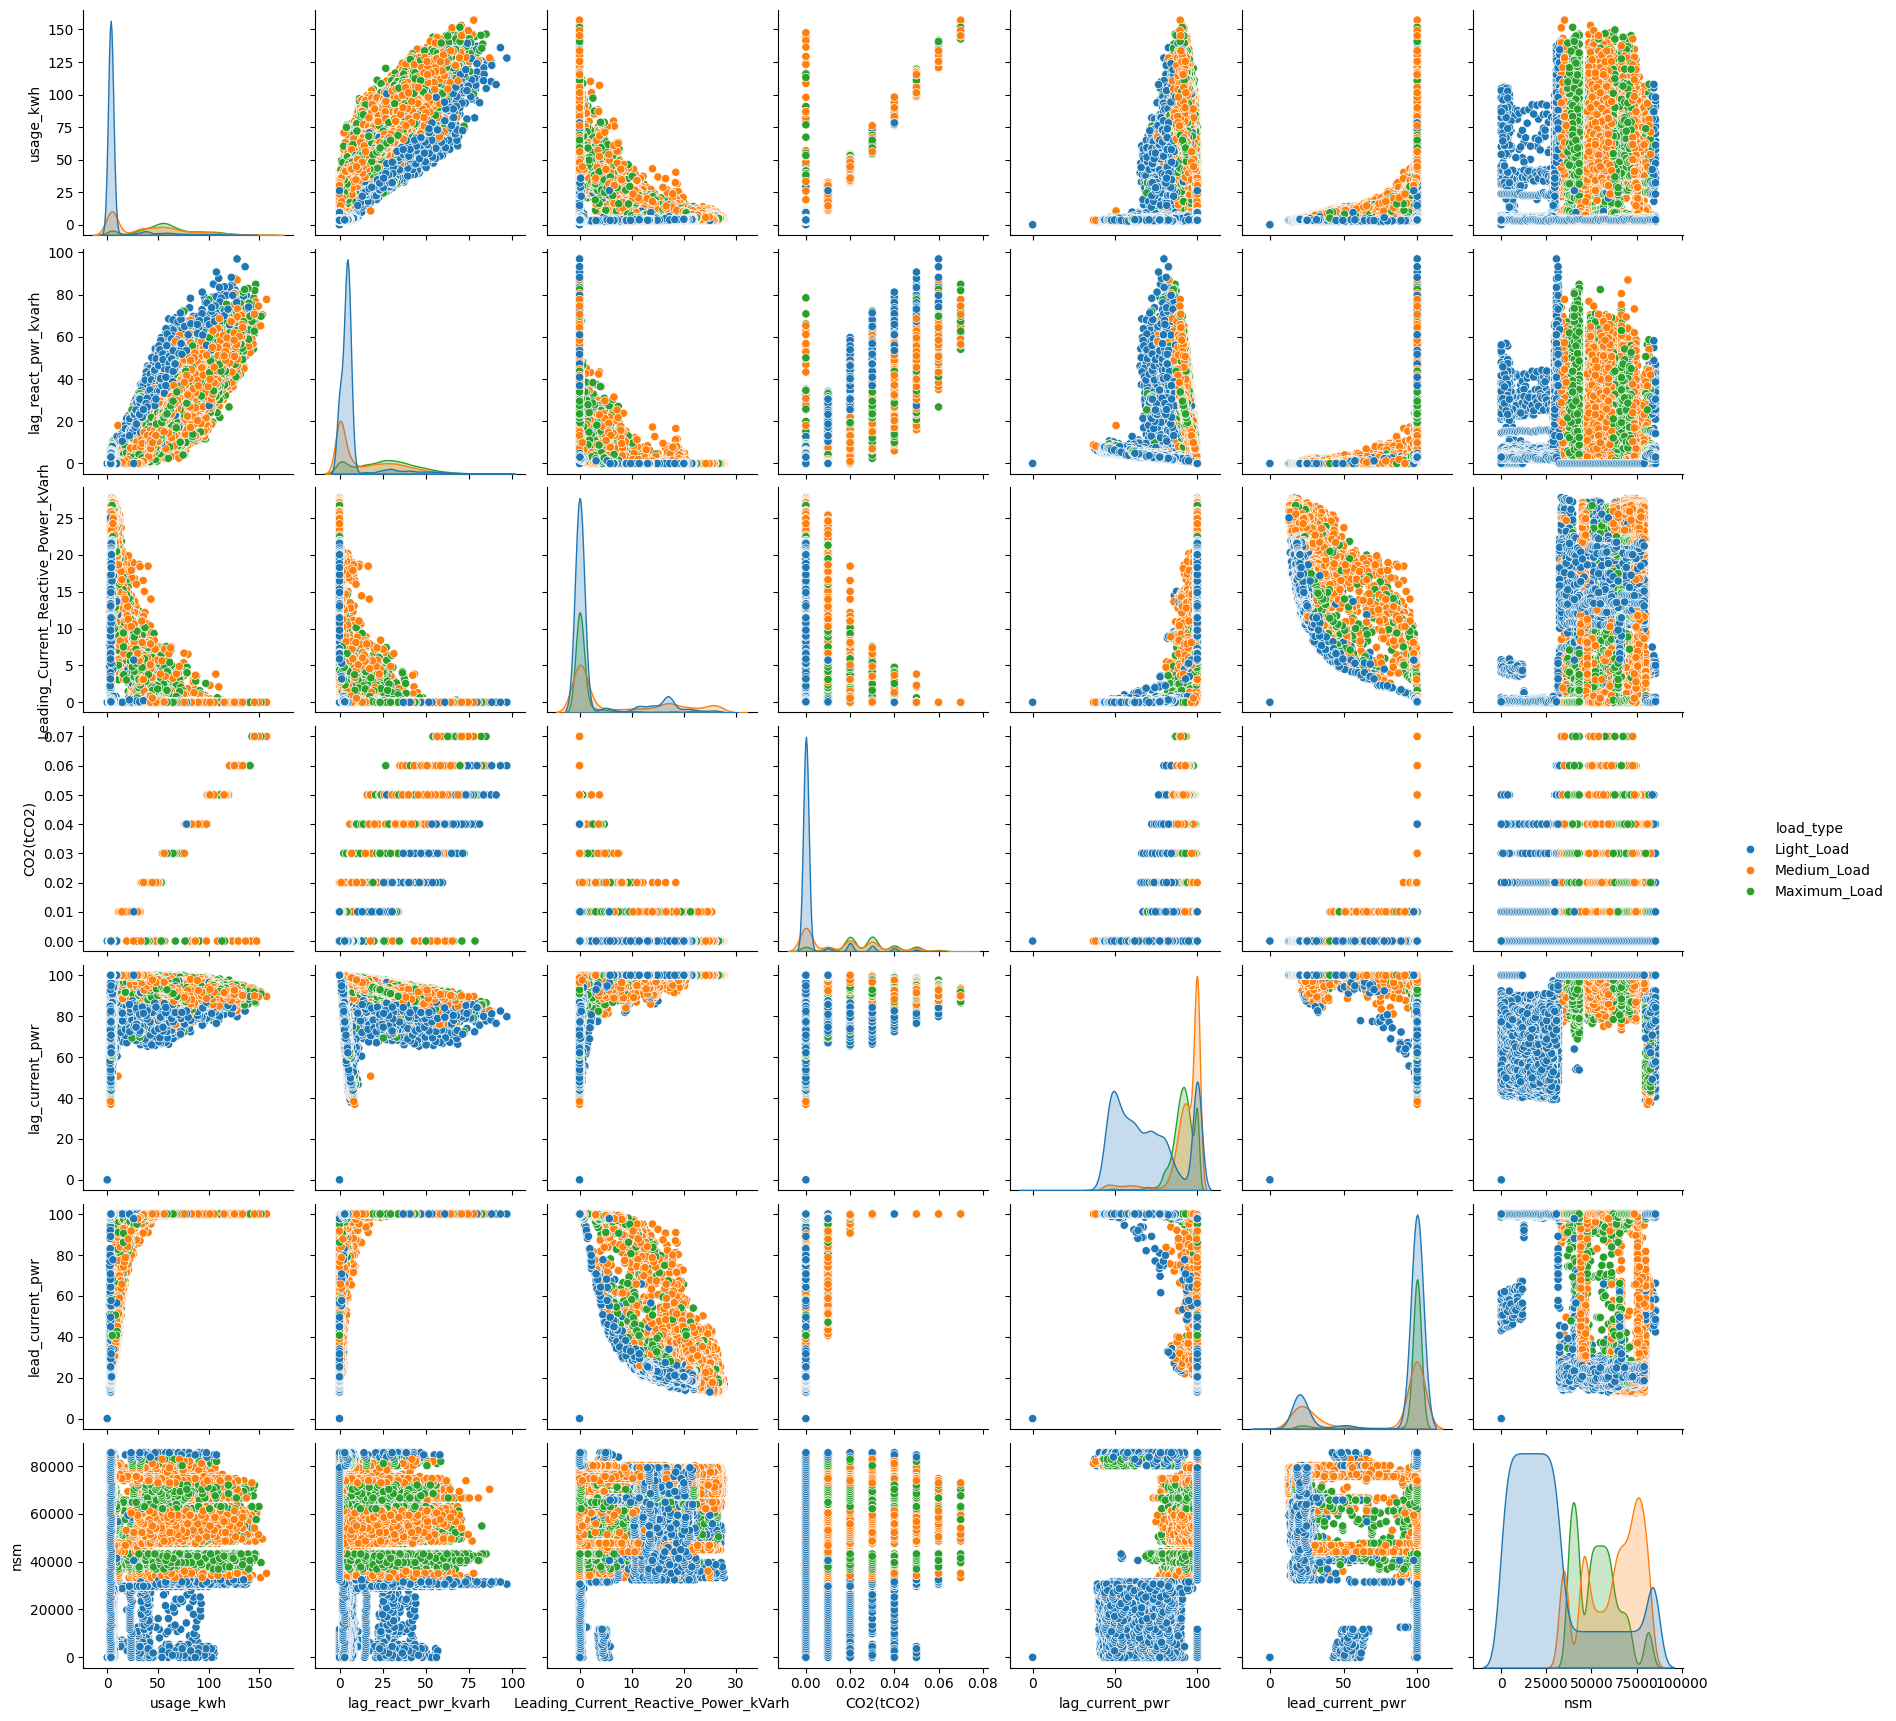

In [46]:
sns.pairplot(df, hue = 'load_type')

This pairplot shows several peices of data that may have a linear relation. Data is typically clustered based on load type. Where there is an outlier, it is usually a light_load.

##<u>Splitting Data Into Train/Test

In [113]:
x = df[['lag_react_pwr_kvarh','lead_react_pwr_kvarh', 'lag_current_pwr', 'lead_current_pwr', 'nsm', 'week_status', 'day_of_week','load_type']]
y = df['usage_kwh'] #Target variable

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =.2, random_state =0)

##<u>Building a Pipeline

In [114]:
num_attribs = ['lag_react_pwr_kvarh','lead_react_pwr_kvarh','lag_current_pwr','lead_current_pwr','nsm']
cat_attribs = ['week_status','day_of_week','load_type']

In [115]:
col_transform = ColumnTransformer(transformers=[
    ('cat',OneHotEncoder(),cat_attribs),('num',MinMaxScaler(),num_attribs)], remainder = 'passthrough')

In [116]:
pipeline = Pipeline([
    ('transform', col_transform),
    ('mlr_model', LinearRegression()),
])

##<u>Executing the Model

In [118]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['week_status', 'day_of_week',
                                                   'load_type']),
                                                 ('num', MinMaxScaler(),
                                                  ['lag_react_pwr_kvarh',
                                                   'lead_react_pwr_kvarh',
                                                   'lag_current_pwr',
                                                   'lead_current_pwr',
                                                   'nsm'])])),
                ('mlr_model', LinearRegression())])

##<u>Evaluating the Model

In [121]:
y_train_pred = pipeline.predict(x_train)
y_test_pred = pipeline.predict(x_test)

In [122]:
print(mean_squared_error(y_train, y_train_pred)**(0.5))
print(mean_squared_error(y_test, y_test_pred)**(0.5))

9.62451910150957
9.627323106208173


This shows us that our model is consistent because the RSME is similar for both train and test.

In [136]:
r2_score(y_test, y_test_pred)

0.9158942668470642

According to this R2 score, our model is right 91% of the time. This makes this model a suitable option for predicting kwh usage.

##<u>Logistic Regression

In [217]:
#df['week_status'] = df['week_status'].apply(lambda x: 1 if x == 'Weekday' else 0)  The Lambda function did not work.
df['week_status'].replace({'Weekday': 1, 'Weekend': 0}, inplace = True)

<ipython-input-217-354dfa052895>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['week_status'].replace({'Weekday': 1, 'Weekend': 0}, inplace = True)


##<u>Splitting Data Into Train/Test

In [218]:
X = df[['usage_kwh','lag_react_pwr_kvarh','lead_react_pwr_kvarh','lag_current_pwr','lead_current_pwr','nsm','load_type']]
Y = df['week_status'] #Target Variable

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size =.2,random_state = 0)

##<u>Building a Pipeline

In [219]:
num_attribs = ['usage_kwh','lag_react_pwr_kvarh','lead_react_pwr_kvarh','lag_current_pwr','lead_current_pwr','nsm']
cat_attribs = ['load_type']

In [220]:

col_transform = ColumnTransformer(transformers=[
    ('cat',OneHotEncoder(),cat_attribs),('num',MinMaxScaler(),num_attribs)
], remainder = 'passthrough')

In [221]:
pipeline = Pipeline([
    ('transform', col_transform),
    ('mlr', LogisticRegression(max_iter = 1000)),
])

##<u>Executing The Model

In [222]:
pipeline.fit(x_train, np.ravel(y_train))

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['load_type']),
                                                 ('num', MinMaxScaler(),
                                                  ['usage_kwh',
                                                   'lag_react_pwr_kvarh',
                                                   'lead_react_pwr_kvarh',
                                                   'lag_current_pwr',
                                                   'lead_current_pwr',
                                                   'nsm'])])),
                ('mlr', LogisticRegression(max_iter=1000))])

##<u>Evaluating The Model

In [223]:
y_pred = pipeline.predict(x_test)

In [224]:
def plot_cm(y_test,y_pred): #custom function to plot the confusion matrix
  cm = confusion_matrix(y_test, y_pred)
  fig= plt.figure(figsize=(10,10))
  heatmap = sns.heatmap(cm,annot=True,fmt ='.2f',cmap ='RdYlGn')

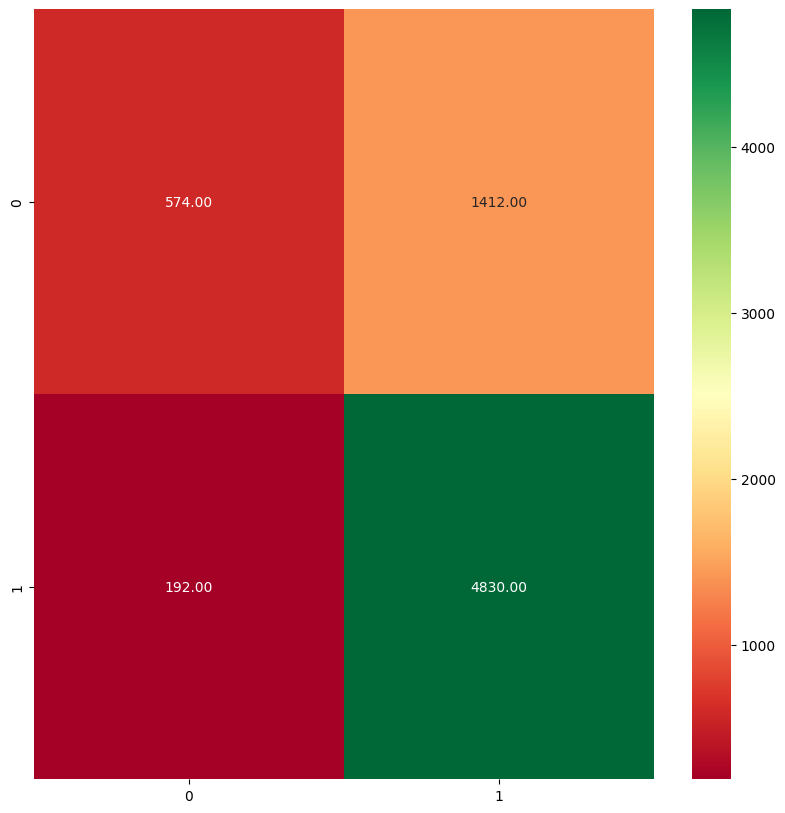

In [225]:
plot_cm(y_test, y_pred)

In [227]:
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.7737904517782762
0.961768219832736
0.8575994318181818


These scores show us that a large portion of the prediction were correct (77%), 96% of all possible were correct, and the average between shows us that our precision and recall scores closely resemble each other.

In [238]:
y_pred_proba = pipeline.predict_proba(x_test)[:,1]

In [239]:
def plot_roc_curve(fpr,tpr): #custom function to plot the roc curve
  plt.plot(fpr,tpr,linewidth = 2)
  plt.plot([0,1],[0,1],'k--')
  plt.xlim([0.0,1.0])
  plt.ylim([0.0,1.0])

0.7675676168865051


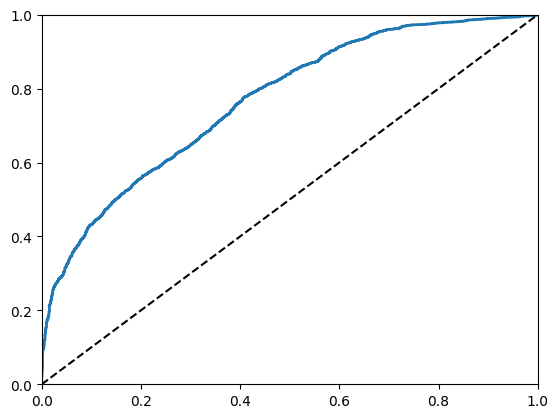

In [241]:
fpr,tpr,_=roc_curve(y_test,y_pred_proba)
plot_roc_curve(fpr,tpr)
print(roc_auc_score(y_test,y_pred_proba))

The ROC curve is giving us data that does align with the precision score we have but feels low for the recall and f1 scores.

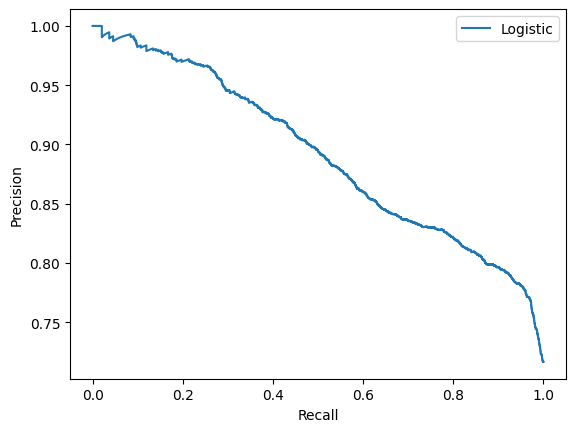

In [243]:
lr_precision, lr_recall, _=precision_recall_curve(y_test,y_pred_proba)
plt.plot(lr_recall,lr_precision,label = 'Logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

In [244]:
auc(lr_recall,lr_precision)

np.float64(0.8910471490782493)

this is a better representation of our data as compared to the precision, recall, and f1 scores

##<u>Conclusion

This model is suitable for predicting week_status as we see high scores in our evaluation of the model. Our precision, recall, and f1 scores were all high and the precision/recall curve and AUC function shows similar results.